### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 2
### Due: Saturday, Jan 25th at 11.59pm CST
---

## Problem 1

This question is about Monte Carlo integration. A standard Gaussian integral takes the form 

$$ \int_0^\infty x^3 \exp\left(-\frac{x^2}{2\sigma^2}\right) \,dx$$

1) What does this integral analytically evaluate to? (Should involve $\sigma$.) Once you work this equation out, we will refer to this equality of the integral and analytic value as EQ1. 

2) Write down the standard form of a Gaussian distribution with $\mu=0$ and $\sigma=\sigma$ that is normalized between $\infty$ and $+\infty$. What is the corresponding form of a half-Gaussian distribution between $0$ and $+\infty$? (Remember that the half-Gaussian distribution must be normalized such that it integrates to one.)

3) Manipulate EQ1 such that you can write the integral in terms of a function of $x$ weighted by a normalized half-Gaussian distribution. 

4) Draw $N=10^5$ samples from a $\sigma=2$ normal distribution, mask the samples such that only positive values are accepted, then perform Monte Carlo integration using your new equation involving a half-Gaussian distribution from (3). Confirm that this *approximately* matches the value computed from the right hand side of the equation. If you don't get approximately matching values then you may have forgotten normalization factors for the Gaussian, or constant factors from translating a normalized Gaussian to a half-Gaussian.

5) Repeat (3) for $N=[10^2,10^3,10^4]$, computing the integral using $100$ different batches of random samples for each $N$. Record all calculated values at all $N$. 

6) Make a plot that shows $\log_{10}N$ along the $x$-axis and the spread between the maximum and minimum Monte Carlo integral values that you get at each $N$ on the $y$-axis. (Note: matplotlib's `fill_between` command is useful for this). Plot a horizontal line on the same figure to show the precise mathematical value. You should see that Monte Carlo integration results in less numerical spread as $N$ gets larger.

### Solution

### 1.

We are given, 
$$\int^{\infty}_{0}  x^3 \exp{\Big(- \frac{x^2}{2\sigma^2}\Big)} dx$$

Using a list of definite integrals to help, we know 

$$\int^{\infty}_{0}x^3\exp{(-\alpha x^2)} = \frac{1}{2\alpha^2}$$

substituting in $\alpha = \frac{1}{2\sigma^2}$

We get,

$$\int^{\infty}_{0}  x^3 \exp{\Big(- \frac{x^2}{2\sigma^2}\Big)} dx = 2\sigma^4$$


### 2. 

Gaussian distribution normalized to 1 in the range $-\infty$ to $+\infty$

$$\int^{+\infty}_{-\infty} \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)dx = 1$$

The corresponding form of a half gaussian from 0 to $+\infty$ normalized to 1 will be,

$$\int^{+\infty}_{0} \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right) = 1$$

### 3. 

Manipulating equation 1, we know that a normalized half gaussian looks like,

$$\int^{+\infty}_{-\infty} \frac{2}{\sigma\sqrt{2\pi}} \exp\left(\frac{-x^2}{2\sigma^2}\right)dx = 1$$

If I multiply Eq 1 by a factor of 1 in the form of $\frac{2}{\sigma\sqrt{2\pi}}$ / $\frac{2}{\sigma\sqrt{2\pi}}$

I can rearrange Eqn 1 to be,

$$\int^{\infty}_{0}  \frac{\sigma\sqrt{2\pi}}{2} x^3  \frac{2}{\sigma\sqrt{2\pi}} \exp{\Big(- \frac{x^2}{2\sigma^2}\Big)} dx = 2\sigma^4$$

where it starts to take the form of,

$$\int_{-\infty}^{\infty} g(x) h(x)\,dx \approx \frac{1}{N}\sum_{i=1}^N g(x_i)$$

with, 

$$ \frac{\sigma\sqrt{2\pi}}{2}\int_{-\infty}^{\infty} x^3  \frac{2}{\sigma\sqrt{2\pi}} \exp{\Big(- \frac{x^2}{2\sigma^2}\Big)} dx $$

with $g(x) = x^3$ and $h(x)$ being our half gaussian function. 






32.16869031811671 32


<>:66: SyntaxWarning: invalid escape sequence '\l'
<>:66: SyntaxWarning: invalid escape sequence '\l'
/var/folders/ls/sw9901md6hg56d8jmwp77nyr0000gp/T/ipykernel_82629/818468196.py:66: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel(f'$\log10(N)$')


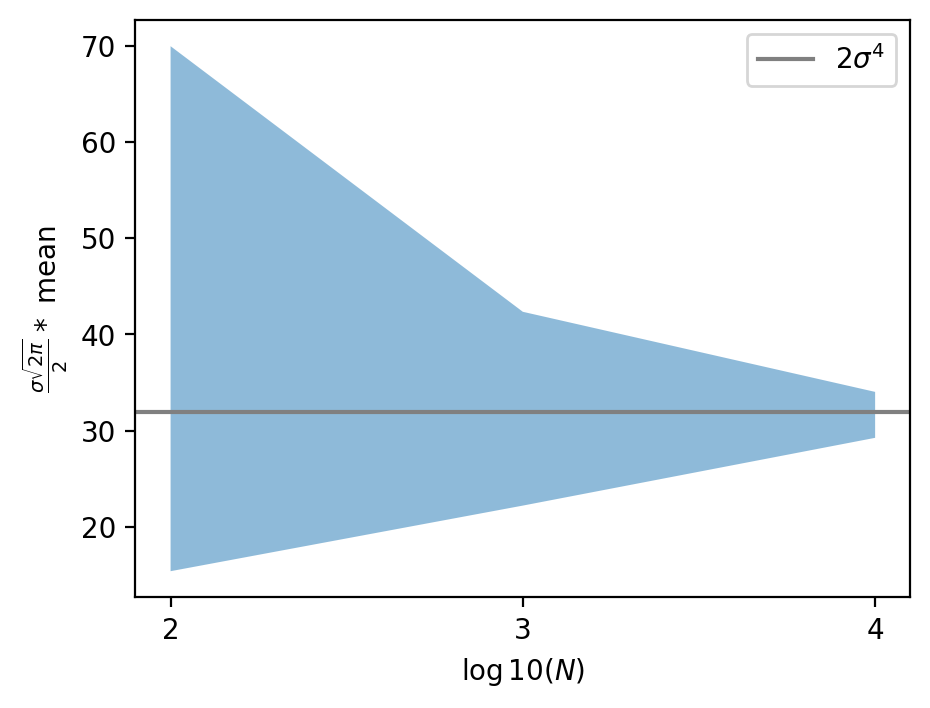

In [57]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from astroML import stats as astroMLstats

# MRS set number of draws and sigma
N = 10**5
sigma = 2

# MRS Initialize gaussian distribution given mu = 0, sigma
dist = norm(0, sigma)

# MRS Make N draws from Gaussian
draws = dist.rvs(N)

# MRS Mask out negative values
mask = draws > 0
data = draws[mask]


# MRS Calculate the mean of x^3
mean = np.average(data**3)

# MRS Print out the Monte-Carlo Integration Value and compare to the theoretical RHS of Eqn 1 from above
print(((sigma * np.sqrt(2*np.pi))/ 2)*mean,  2*sigma**4)



# MRS Defining a function to calculate the Monte-Carlo integration value for 100 batches of a given number of draws N
def calc_mont(N_draws, iter, sigma):

    # MRS Initialize Gaussian distribution
    dist = norm(0, sigma)
    
    # MRS Create list to store all 100 samples later
    vals = []

    # MRS Run this Monte Carlo Integration 'iter' number of times, this case 100 times
    for i in range(0, iter):
        draws = dist.rvs(N_draws)
        mask = draws > 0 
        data = draws[mask]

        mean = np.average(data**3)
        vals.append(((sigma * np.sqrt(2*np.pi))/ 2)*mean)
    
    tot_val = np.average(vals)
    return vals, tot_val


# MRS Do this for three different draw sizes N = 10^2, 10^3, 10^4
vals1, tot_val1 = calc_mont(10**2, 100, 2)
vals2, tot_val2 = calc_mont(10**3, 100, 2)
vals3, tot_val3 = calc_mont(10**4, 100, 2)

fig, ax = plt.subplots(figsize=(5, 3.75))
# MRS Plot the min and max values of each sampling and the RHS theoretical values
plt.fill_between(np.log10([10**2, 10**3, 10**4]), [np.min(vals1), np.min(vals2), np.min(vals3)], [np.max(vals1), np.max(vals2), np.max(vals3)], alpha=0.5)
plt.axhline(y=2*sigma**4, linestyle='-', color='gray', label=r'$2\sigma^4$')
plt.xticks([2, 3, 4])
plt.xlabel(f'$\log10(N)$')
plt.ylabel(r'$\frac{\sigma \sqrt{2\pi}}{2}*$ mean')
plt.legend()




SRT: Excellent


## Problem 2

This question is about IQ. It's a flawed and questionable metric, but useful for this problem. By definition, IQ is calibrated as a Gaussian distribution with $\mu=100$ and $\sigma=15$. 

1) Create a `scipy.stats` Gaussian object with these properties. Plot the distribution, and print out 10 random draws, along with the pdf at $x=150$. 

2) Access the `cdf` property of the Gaussian object and plot it over the same $x$-range as in (1) but in a different figure. Access the `ppf` property (percent point function) and use *inverse transform sampling* of the cdf to draw $10^5$ random samples, and make a histogram of these. Overplot the pdf from (1). These should match.

3) What fraction of people have IQ > 150? *Hint: investigate all the properties of the Gaussian object from (1) to find the relevant property that gives you this, or perform a calculation involving the cdf.*

4) What IQ corresponds to "one in a million"?

### Solution

Draws: [114.04314677  73.69138938 101.75667419  85.62295025 109.29241257
 113.72225421  89.94013016 105.92602732  74.84081328 124.5711202 ], PDF(150): 0.0001
Fraction of people with IQ > 150:  0.0004
IQ of one in a million:  171.30 
 or:  28.70


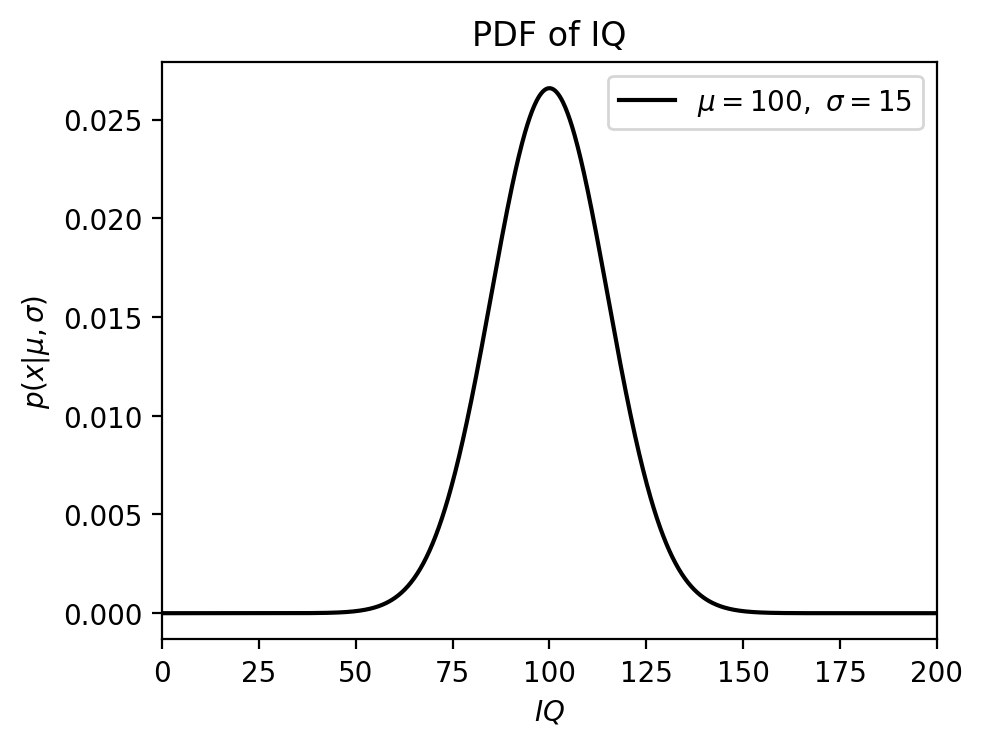

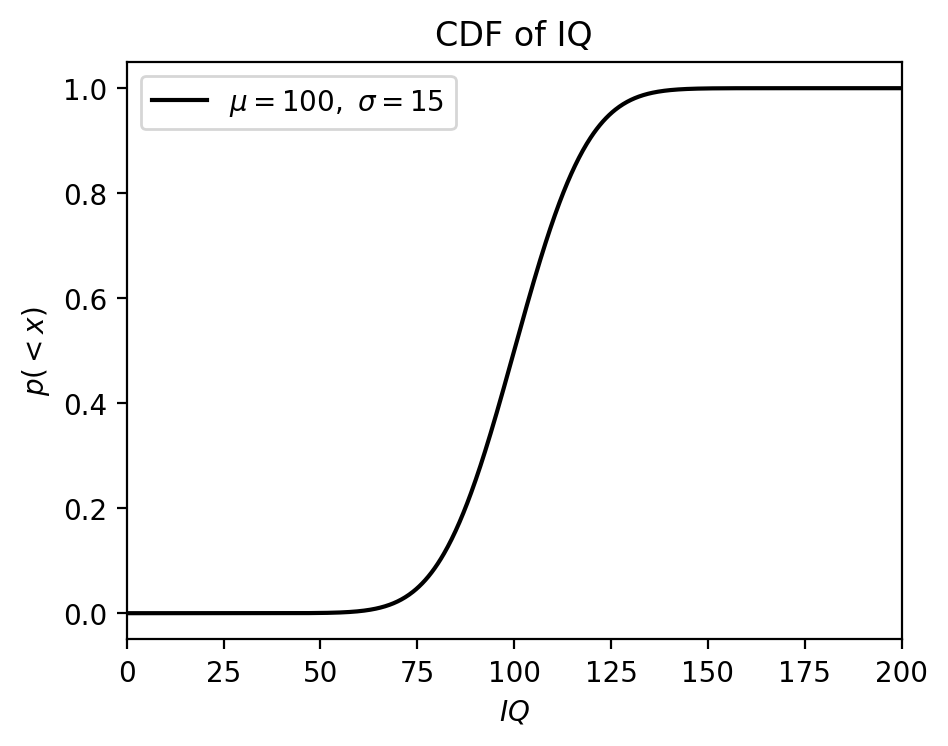

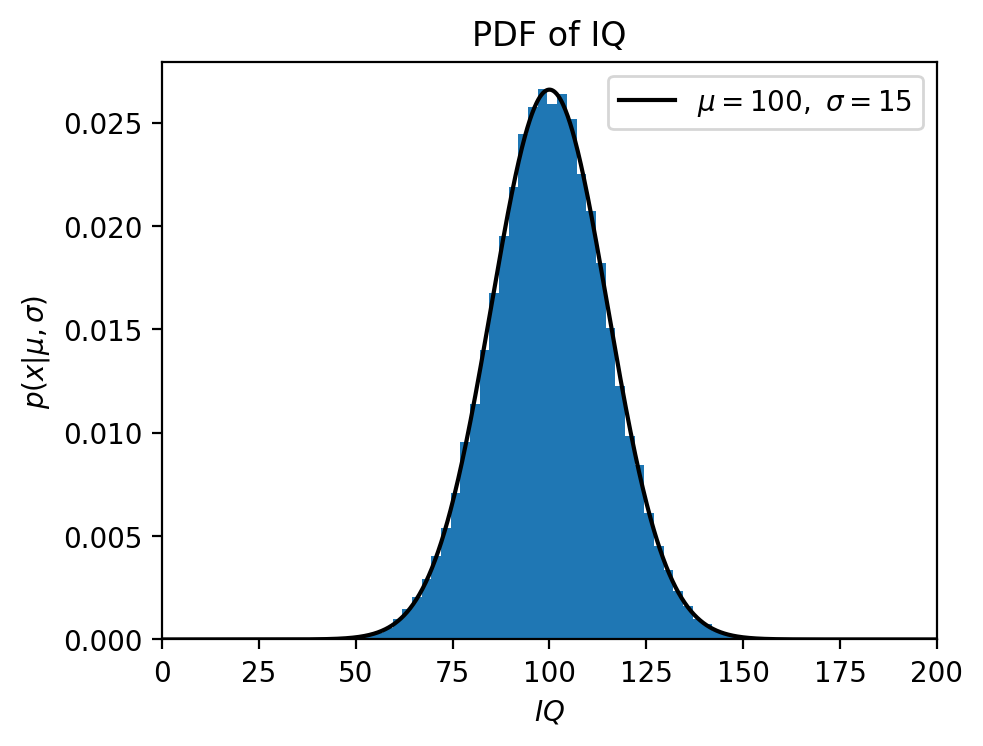

In [54]:

# MRS Create a grid from 0 to 200 with 1000 points to properly sample the gaussian distribution given
xgrid = np.linspace(0, 200, 1000)

# MRS Initialize Gaussian with mu = 100, sigma = 15
dist = norm(100, 15)

# MRS Calculate the CDF over the xgrid
cdf = dist.cdf(xgrid)

# MRS Make 10 random draws from distribution
draws = dist.rvs(10)

# MRS Calculate the PDF at x = 150, and over the xgrid
p = dist.pdf(150)
gaussPDF = dist.pdf(xgrid)

# MRS Plot the PDF
fig, ax = plt.subplots(figsize=(5, 3.75))


plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 200)
plt.xlabel(r'$IQ$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('PDF of IQ')
plt.legend()

# MRS Report the number of draws and the PDF at x=150
print(f'Draws: {draws}, PDF(150): {p:.4f}')



# Plotting the CDF of distribution
fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(xgrid, cdf, ls='-', c='black', 
         label=r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 200)
plt.xlabel('$IQ$')
plt.ylabel(r'$p(< x)$')
plt.title('CDF of IQ')
plt.legend()


# Plotting the PDF of distribution
fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=r'$\mu=100,\ \sigma=15$')
plt.xlim(0, 200)
plt.xlabel('$IQ$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('PDF of IQ')
plt.legend()

# MRS Sample the y-range of the CDF N=10^5 times
y_sample =  np.random.random(10**5)

# MRS Use the ppf function to calculate the x_vals at each sampled y_val
ppf_vals = dist.ppf(y_sample)

# MRS plot the historgram demonstrating the inverse transform sampling method
_ = plt.hist(ppf_vals, bins = 50, density=True)


# MRS Printing the fraction of people with IQ > 150
print("Fraction of people with IQ > 150: ", "%.4f"%(1-dist.cdf(150)))

# MRS Printing both types of a one in a million IQ
print("IQ of one in a million: ", "%.2f"%dist.ppf(1-(1/10**6)), '\n or: ', "%.2f"%dist.ppf(1/(10**6)))


SRT: Good, and very efficient and vectorized too.

## Problem 3

This question is about Poisson distributions. A famous early application was an analysis of Prussian cavalryman horse-kick deaths by [Bortkiewicz](https://www.wikiwand.com/en/Ladislaus_Bortkiewicz) in 1898. Let's take a short look at the kind of data he analyzed.

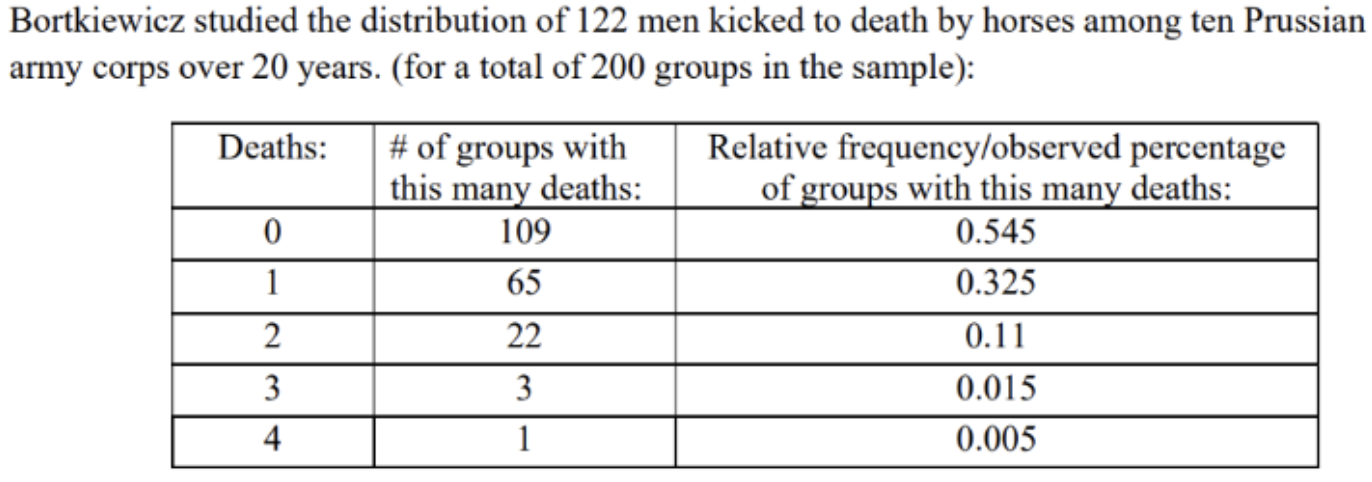

The data essentially consist of 200 total years of Prussian army corps information (i.e. ten army corps over 20 years).

1) Make a plot of the first and third columns of this data.

2) Plot a few Poisson distributions on top that are characterized by different $\mu$ values that might be reasonable guesses for how the data is distributed.

3) We'll come to model fitting soon, but for now use the descriptive sample statistics that you can calculate from this data to deduce the $\mu$ of the modeled Poisson distribution, e.g. the mean, std, median, mode, skewness, and kurtosis, where relevant. Do this however you like, but note that with the data in the table you won't just be able to get a sample mean, since these are tabulated densities, not samples. 

*Hint: use a weighted mean, or alternatively make a dataset that has the numbers 0,1,2,3,4 in agreement with their frequency in the table.*

4) Plot the Poisson distribution with the $\mu$ found in (3) alongside the data.

### Solution

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/var/folders/ls/sw9901md6hg56d8jmwp77nyr0000gp/T/ipykernel_82629/2210372341.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, pdf, '-o',  color=c, alpha= 0.4, label=f'$\mu=' + str(mu) + '$')
/var/folders/ls/sw9901md6hg56d8jmwp77nyr0000gp/T/ipykernel_82629/2210372341.py:32: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(deaths, poisson.pmf(deaths, mean), label=f'$\mu={mean:.2f}$')


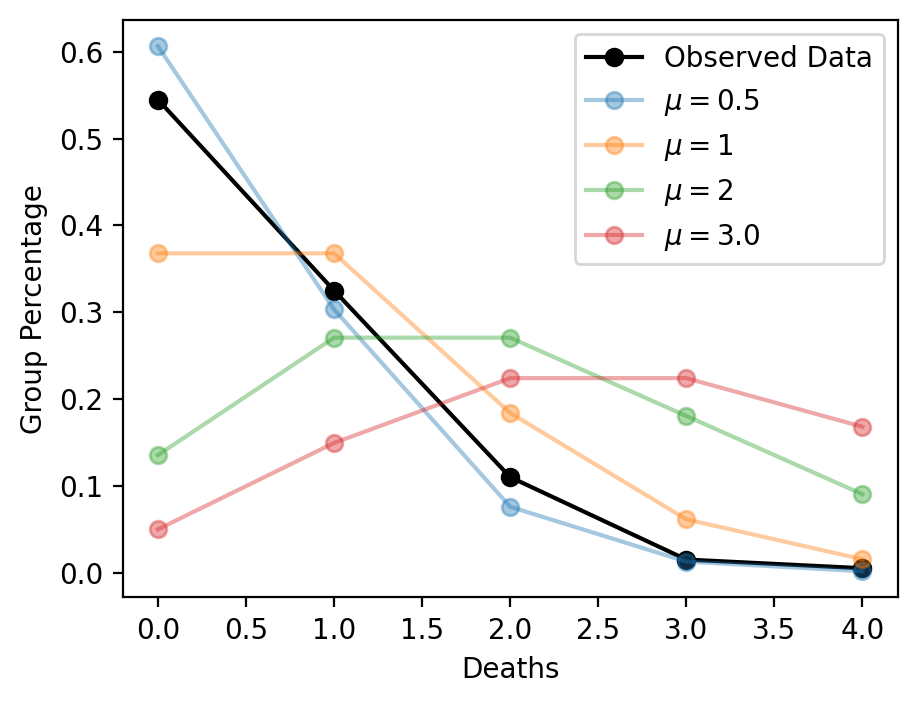

0.61


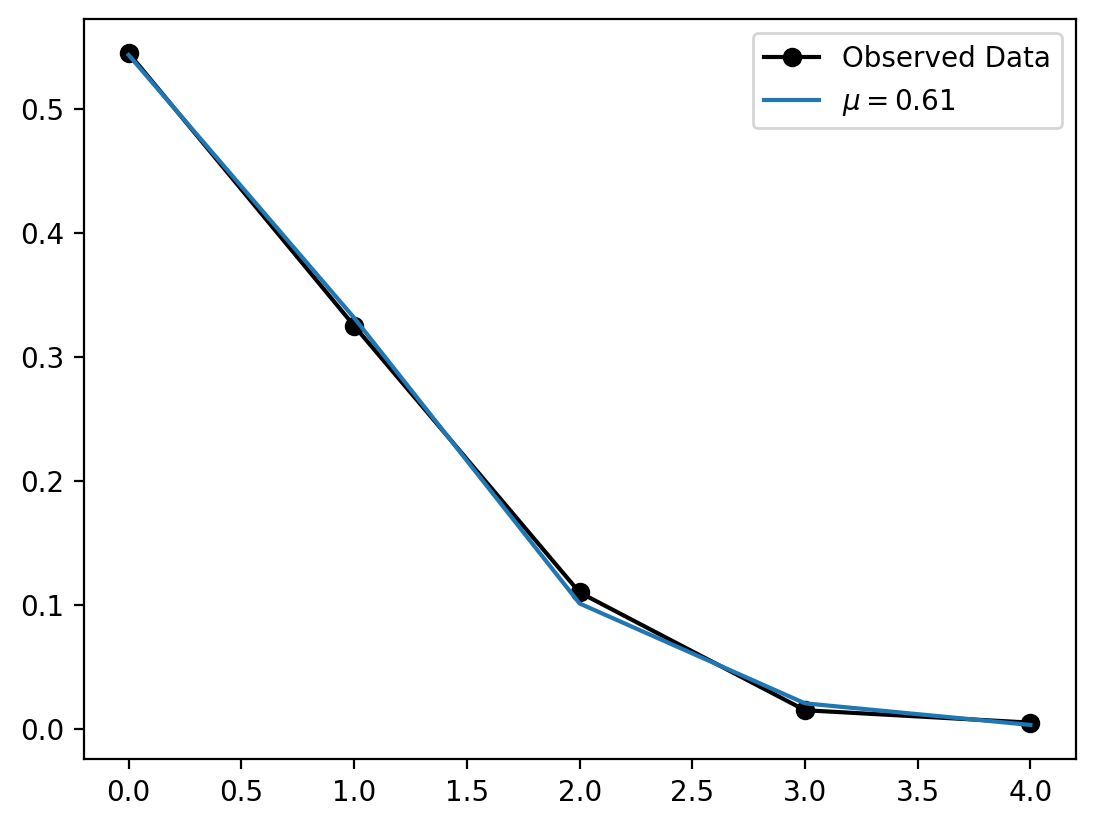

In [55]:
from scipy.stats import poisson
import seaborn as sns

# MRS Store the data from the table into useable arrays
deaths = np.array([0, 1, 2, 3, 4])
rel_perc = np.array([0.545, 0.325, 0.11, 0.015, 0.005])

# MRS Roughly plot the deaths and relative frequency per group
fig, ax = plt.subplots(figsize=(5, 3.75))

plt.plot(deaths, rel_perc,'-o', c='black', label='Observed Data')
    
# MRS Given a few guess of a mu for a poisson distribution calcuate corresponding group relative percentage values
for mu, c in zip([0.5, 1,2,3.0], 
                 sns.color_palette()[:4]):
    # MRS random draws given mu
    pdf = poisson.pmf(deaths, mu)
    # MRS plot line corresponding to poisson distribution of given mu
    plt.plot(deaths, pdf, '-o',  color=c, alpha= 0.4, label=f'$\mu=' + str(mu) + '$')
    
plt.xlabel('Deaths')
plt.ylabel(r'Group Percentage')
plt.title('')
plt.legend()
plt.show()

# MRS Calculating the weighted mean
mean = np.sum(deaths * rel_perc)

# MRS Plot the observed data and the poisson distribution corresponding to the calculated weighted mean
plt.plot(deaths, rel_perc,'-o', c='black', label='Observed Data')
plt.plot(deaths, poisson.pmf(deaths, mean), label=f'$\mu={mean:.2f}$')
plt.legend()

# MRS Print the mean
print("%.2f"%mean)




SRT: 50/50